In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# load, clean and process data

df = pd.read_csv('https://raw.githubusercontent.com/bkennedy2022/427Final/master/data%20processing/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

cleaned = df.loc[(df['submission_date'].notnull()) & (df['tot_cases'].notnull())]

model_data = cleaned[['submission_date', 'tot_cases']]
model_data = model_data.groupby('submission_date').agg({'tot_cases':'sum'})
model_data = model_data.reset_index()
model_data

,submission_date,tot_cases
0,01/01/2021,20236863
1,01/02/2021,20516864
2,01/03/2021,20725195
3,01/04/2021,20907526
4,01/05/2021,21142325
...,...,...
459,12/27/2020,19204735
460,12/28/2020,19386334
461,12/29/2020,19595012
462,12/30/2020,19831758


In [4]:
# split the data and fit 

dates = model_data['submission_date']
dates = pd.to_datetime(dates).to_frame()
cases = model_data['tot_cases'].to_frame()

# train-test split
X_train, X_test, y_train, y_test = train_test_split(dates, cases, test_size=0.30, random_state=42)

X_train_int = X_train.squeeze().map(datetime.toordinal).to_frame()
X_test_int = X_test.squeeze().map(datetime.toordinal).to_frame()

# fit
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
# polynomial_features = PolynomialFeatures(degree = 5)
# X_train_transf = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_int, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

3674247.016622766
0.888510733879807


<Figure size 1200x1200 with 0 Axes>

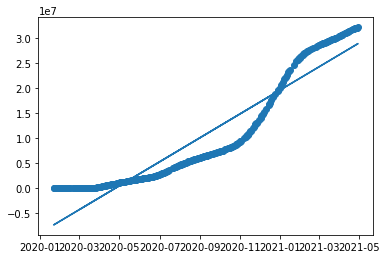

<Figure size 1200x1200 with 0 Axes>

In [5]:
# test
y_new_pred = model.predict(X_train_int)

# calculate bias and variance
rmse = np.sqrt(mean_squared_error(y_train,y_new_pred))
r2 = r2_score(y_train,y_new_pred)
print(rmse)
print(r2)

# plot some stuff
plt.scatter(X_train, y_train)
plt.plot(X_train, y_new_pred)
figure(figsize=(15, 15), dpi=80)

3881132.704130898
0.8750791029679099


<function matplotlib.pyplot.show(close=None, block=None)>

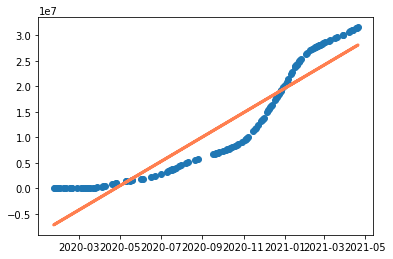

In [6]:
# predict
#X_test_transf = polynomial_features.fit_transform(X_test)
y_pred = model.predict(X_test_int)

# calculate bias and variance
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(rmse)
print(r2)

# plot 
plt.plot(X_test, y_pred, color='coral', linewidth=3)
plt.scatter(X_test, y_test)
plt.show

                    0
2021-05-04 2021-05-04
2021-05-05 2021-05-05
2021-05-06 2021-05-06
2021-05-07 2021-05-07
2021-05-08 2021-05-08
...               ...
2022-04-30 2022-04-30
2022-05-01 2022-05-01
2022-05-02 2022-05-02
2022-05-03 2022-05-03
2022-05-04 2022-05-04

[366 rows x 1 columns]


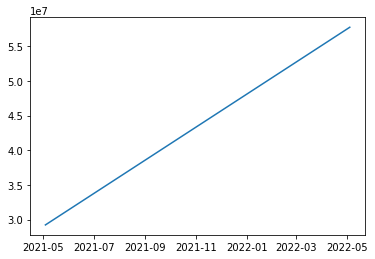

In [7]:
# predict for future
dates_to_predict = pd.date_range(start='2021-05-04', end='2022-05-04').to_frame()
print(dates_to_predict)

dates_to_predict_int = dates_to_predict.squeeze().map(datetime.toordinal).to_frame()

# predict
y_pred_future = model.predict(dates_to_predict_int)

# plot
plt.plot(dates_to_predict, y_pred_future)

In [8]:
# # load to csv

# # actual data
# model_data.to_csv('csv_files/actual_data.csv')


# # model predictions data
# dates_int = dates.squeeze().map(datetime.toordinal).to_frame()
# y_pred_data = model.predict(dates_int)
# y_pred = pd.DataFrame(y_pred_data)
# model_pred = dates.join(y_pred)
# model_pred.columns = ['submission_date', 'tot_cases_pred']
# model_pred.to_csv('csv_files/pred_on_data.csv')


# # model predictions for future
# y_pred_fut = pd.DataFrame(y_pred_future)
# y_pred_fut.columns = ['tot_cases_pred']
# dates_to_predict.columns = ['date']
# dates_to_predict = dates_to_predict.reset_index()
# model_pred_fut = dates_to_predict.join(y_pred_fut)
# model_pred_fut = model_pred_fut.drop(['index'], axis=1)
# model_pred_fut.to_csv('csv_files/pred_for_future.csv')